In [59]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
plt.rcParams['figure.figsize'] = 15, 10

# Что такое нейронная сеть

**Нейронная сеть** — это последовательность нейронов, соединенных между собой синапсами. Структура нейронной сети пришла в мир программирования прямиком из биологии. Благодаря такой структуре, машина обретает способность анализировать и даже запоминать различную информацию. Нейронные сети также способны не только анализировать входящую информацию, но и воспроизводить ее из своей памяти.  
![Нейрон](http://aboutyourself.ru/assets/sinaps.jpg)
**Аксон** — длинный отросток нейрона. Приспособлен для проведения возбуждения и информации от тела нейрона к нейрону или от нейрона к исполнительному органу.  
**Дендриты** — короткие и сильно разветвлённые отростки нейрона, служащие главным местом для образования влияющих на нейрон возбуждающих и тормозных синапсов (разные нейроны имеют различное соотношение длины аксона и дендритов), и которые передают возбуждение к телу нейрона. 


## Перцептрон

<img src="https://c.mql5.com/2/41/512210577402.png" alt="Искуственный нейрон" width=40% height=40% >

$X$ - входящий вектор признаков  
$W$ - веса модели  
$b$ - сдвиг модели   
$y$ - результат модели  
$\sigma$ - функция активации

**<center>Смещение</center>**
$$
X_0 = 1
$$
$$
S = \sum_{i=0}^nX_iw_i
$$

# Полносвязная неронная сеть

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Neural_network.svg/1200px-Neural_network.svg.png" alt="FCNeuralNetwork" width=30% height=30%>
Схема простой нейросети. Зелёным цветом обозначены входные нейроны, голубым — скрытые нейроны, жёлтым — выходной нейрон

$$
\vec {h_t} = W_h \vec x
$$

$$
\vec h = F_h(\vec{h_t})
$$

$$
\vec {y_t} = W_y \vec h
$$

$$
\vec y = F_y(\vec{y_t})
$$


<img src="https://neurohive.io/wp-content/uploads/2018/10/obuchenie-neironnyh-setei-glubokoe.gif" alt="FCNeuralNetwork" width=60% height=60%>

**Набор данных MNIST**

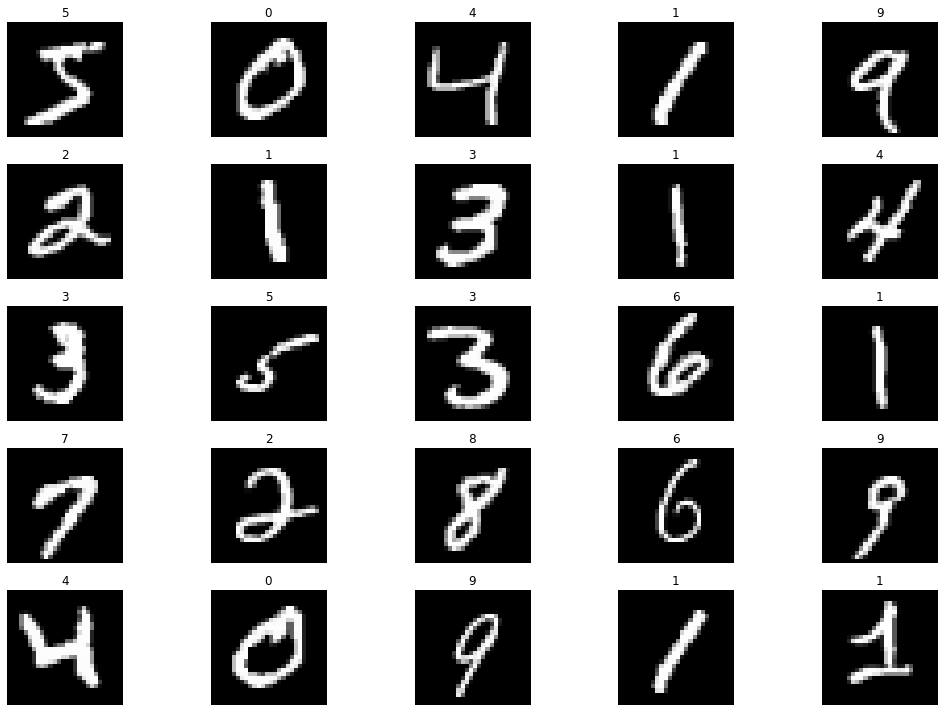

In [60]:
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize((0.5), (0.5))
                                            ])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=False)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False)


# Printing 25 random images from the training dataset
random_samples = np.random.randint(1, len(train_dataset), (25))

for idx in range(random_samples.shape[0]):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')


plt.tight_layout()
plt.show()

Образцы рукописных цифр из набора данных MNIST, 

In [131]:
test1 = train_dataset[0]
# (Img, label)
test1

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [1]:
from IPython.display import Video

Video("data/MNIST.mp4")

**Превратим данные в вектора**

In [158]:
def encode_label(j):
    # 5 -> [[0], [0], [0], [0], [0], [1], [0], [0], [0], [0]]
    e = np.zeros((10,1))
    e[j] = 1.0
    return e

def shape_data(data):
    features = [np.reshape(x[0][0].numpy(), (784,1)) for x in data]
    #print('features\n', len(features[0]))
    labels = [encode_label(y[1]) for y in data]
    #print('labels\n', len(labels[0]))
    return zip(features, labels)

In [157]:
test2 = [test1]
reshape = shape_data(test2)
list(reshape)

features
 784
labels
 10


[(array([[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0

In [167]:
train = shape_data(train_dataset)
test = shape_data(test_dataset)

In [168]:
train = list(train)
test = list(test)
print('train', len(train))
print('test', len(test))

train 60000
test 10000


In [ ]:
# Итого:
#   Изображения превращены в векторы размера 784, лэйблы - 10
#   Осталось подобрать такой ветор весов W, чтобы умножение цифры 8 с ним
#   давало большое значение

<img src="images/LessonsII/vec_multiplication.jpg" alt="vector scalar multiplication" width=40% height=40% >

Где V - это вектор каринки, W - веса нейросети


**Веса перцептрона**

In [1]:
# Что нужно для распознавания 8ки?
# 1) Параллельные вектора. 
# Чтобы умножение давало максимальное значение
# 2) Получить образ числа
# среднее представление 8ки (также как человек имеет среднее представление у себя в голове)

In [173]:
def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)

In [174]:
avg_eight = average_digit(train, 8)

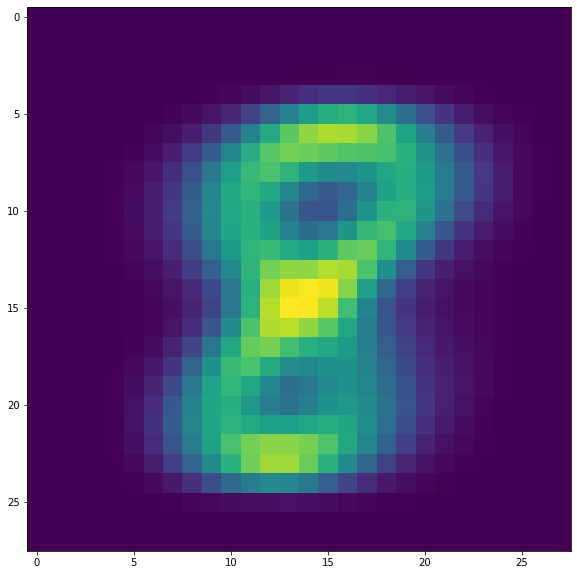

In [175]:
img = (np.reshape(avg_eight, (28, 28)))
plt.imshow(img)
plt.show()

Это  среднее  представление  цифры  8,  avg_eight,  в  обучающем  наборе  MNIST 
содержит большое количество информации о том, какими общими свойствами 
должны  обладать  изображения  восьмерки.  Мы  используем  avg_eight  в  качестве 
параметров простой модели, чтобы определить, является ли данный входной вектор x, представляющий цифру, изображением восьмерки. Когда речь идет о нейронных сетях, под параметрами, как правило, подразумеваются веса, и в данном 
случае avg_eight будет выступать именно в качестве веса.

In [176]:
# train[indx][img/label]
x_2 = train[2][0] # 4-ка
x_17 = train[17][0] # 8-ка
W = np.transpose(avg_eight)

In [197]:
train[17][1]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

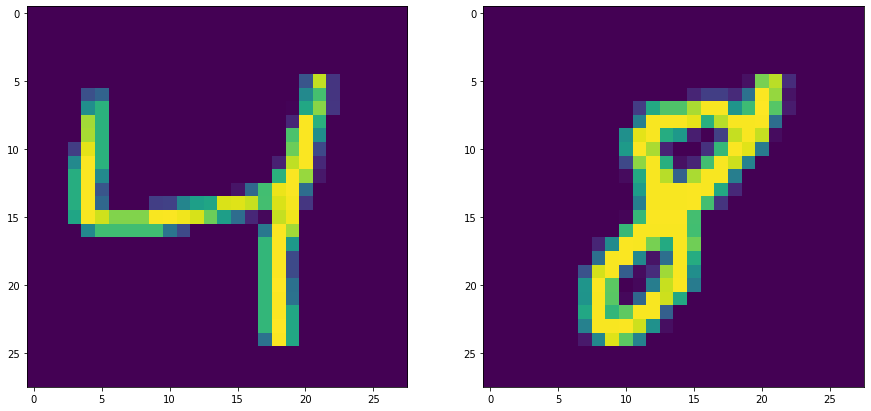

In [200]:
img_2 = (np.reshape(x_2, (28, 28)))
img_17 = (np.reshape(x_17, (28, 28)))

plt.subplot(1, 2, 1)
plt.imshow(img_2)
plt.subplot(1, 2, 2)
plt.imshow(img_17)
plt.show()

Вычислим скалярное произведение W и x, т. е. попарно перемножим 
значения W и x и суммируем все 784 результирующих значения. Если наша гипотеза верна и x соответствует 8, то более темные пикселы должны располагаться примерно в тех же местах, что и в случае W, и наоборот. Если же х не соответствует 8, то 
совпадений должно быть меньше. Давайте проверим эту гипотезу на нескольких 
примерах.

In [205]:
res_4by8 = np.dot(W, x_2)[0][0]
res_4by8

20.095028

In [206]:
res_8by8 = np.dot(W, x_17)[0][0]
res_8by8

54.5326

**Sigmoid**

$$
F(x) = {1 \over 1 + e^{-x}}
$$

<img src="images/LessonsII/sigmoid.png" alt="Sigmoid" height=40% width=40%>

In [186]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [208]:
sigmoid(res_4by8)

0.9999999981256951

In [210]:
sigmoid(res_8by8)

1.0

Добавим "смещение"

In [188]:
b = -45

In [187]:
def predict(x, W, b):
    return sigmoid(np.dot(W,x) + b)

In [211]:
predict(x_2, W, b)[0][0]

1.5272427e-11

In [212]:
predict(x_17, W, b)[0][0]

0.9999275

<img src="images/LessonsII/regression.png" alt="Regression" height=50% width=50%>

Верность предсказаний нашей простой модели составляет **78 %** (0,7814) - на обучающих данных и
**77 %** (0,7749) на тестовых

**FC**

<img src="images/LessonsII/mnist_fc.png" alt="Regression" height=40% width=40%>

In [2]:
Video("data/FC.mp4")

Минусы
- Большое количество параметров
- Отсутствие трансляционной инвариантности

# Задание

1. Рассчитать average_digit (матрицу весов) для каждой цифры от 0 до 9, по аналогии с (avg_eight).
2. Объеденить получившиеся веса в одну модель, которая на вход принимает картинку, а выдаёт вектор размера 10.
3. Рассчитать точность получившейся модели на тестовом наборе.
4. Визуализировать набор необработанных данных с помощью алгоритма t-SNE. Взять 30 изображений каждого класса, каждое изображение перевести в вектор размера (784), визуализировать полученные вектора с помощью t-SNE.
5. Визуализировать результаты работы вашей модели (эмбединги) с помощью алгоритма t-SNE. Прогнать изображения через вашу модель, получившиеся вектора размера (10) визуализировать с помощью t-SNE.

## Что должно получиться (примерно):

MNIST_images
<img src="images/LessonsII/mnist_training_data_tSNE.png" alt="Regression" height=30% width=30%>
MNIST_embeddings
<img src="images/LessonsII/mnist_embeddings_tSNE.png" alt="Regression" height=30% width=30%>